/reg/d/psdm/cxi/cxilv0418/scratch/northeyt/xtcav_stats_run43.h5
<HDF5 file "xtcav_stats_run43.h5" (mode r)>
(297, 128)
[81 77 78 79 76 84 81 82 79 76 73 76 76 75 82 78 76 75 78 86 79 77 74 82
 82 79 74 80 77 82 80 75 73 75 81 77 76 75 74 77 73 79 77 80 77 74 78 74
 74 77 75 73 72 75 76 75 76 74 76 74 81 81 77 75 79 74 74 79 76 75 77 45
 75 78 75 84 75 72 73 46 80 75 79 83 75 76 77 41 42 77 78 84 74 76 83 75
 76 76 77 77 78 76 76 79 77 79 74 79 77 82 78 77 74 77 74 74 75 78 83 80
 76 83 79 77 86 77 76 73 76 77 76 75 80 78 78 77 80 73 78 79 76 74 76 76
 76 76 79 74 76 74 77 80 79 78 77 81 76 82 77 79 79 76 78 76 76 76 75 78
 77 77 78 77 78 77 78 79 76 75 78 77 81 78 76 82 77 80 81 80 72 78 76 79
 76 75 78 78 76 75 74 74 76 75 76 77 75 79 78 76 76 74 74 76 79 74 79 76
 75 77 74 74 77 74 73 77 74 74 72 75 79 76 72 74 75 74 81 75 76 75 77 73
 76 81 75 76 78 79 78 75 81 77 76 72 77 73 82 79 78 80 77 78 78 76 74 77
 75 74 77 80 73 73 73 78 74 82 77 76 78 75 77 77 76 74 77 76 76 75 74 74
 76 7

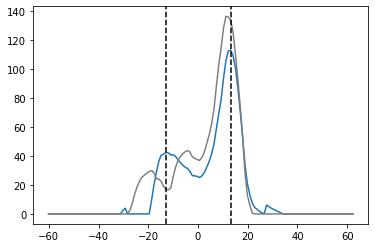

In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema

import sys
sys.path.append('../')
# import my functions
from define_experiment_run import experiment, run, scratch_dir, Nevents

# load h5 file
fname = '%sxtcav_stats_run%d.h5' % (scratch_dir, run)
print(fname)
f = h5py.File(fname, 'r')
print(f)
list(f.keys())
tCOM = f['tCOM'][:]
tRMS = f['tRMS'][:]
powerCOM = f['powerCOM']
powerRMS = f['powerRMS']
print(tCOM.shape)

# only look at COM now...
dt_COM = f['dt_COM']
#print(dt_COM[:])
imax1_COM = f['imax1_COM'][:]
imax2_COM = f['imax2_COM'][:]
print(imax1_COM)
print(imax2_COM)
agreement = f['agreement'][:]
print('agreement:')
print(agreement)

n = 9
print(tCOM.shape)
print(imax1_COM[n])
plt.plot(tCOM[n, :], powerCOM[n, :])
plt.plot(tRMS[n, :], powerRMS[n, :], color='grey')
plt.axvline(x=tCOM[n, imax1_COM[n]], color='black', linestyle='dashed')
plt.axvline(x=tCOM[n, imax2_COM[n]], color='black', linestyle='dashed')
print(powerCOM[n, imax1_COM[n]]) # correct max for first peak
print(powerCOM[n, imax1_COM[n]-1])
print(powerCOM[n, imax1_COM[n]+1])

print(powerCOM[n, imax2_COM[n]]) # correct max for second peak
print(powerCOM[n, imax2_COM[n]-1])
print(powerCOM[n, imax2_COM[n]+1])

print('agreement = %f' % agreement[n])
print('dt = %f' % dt_COM[n])


In [5]:

tmp = agreement[n:]
nvalid = len(tmp)
print('Equal 0:')
print(np.sum(tmp == 0))
print(np.sum(tmp > 0.9) / nvalid)
print(np.sum(tmp > 0.8) / nvalid)
print(np.sum(tmp > 0.5) / nvalid)

Equal 0:
0
0.3595863935059915
0.8291940471588712
0.9771453420950909


Text(0, 0.5, 'Counts')

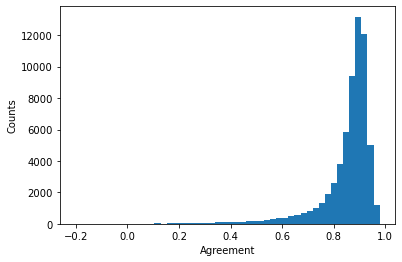

In [10]:
plt.hist(agreement, bins=50)
plt.xlabel('Agreement')
plt.ylabel('Counts')